# Occupanza in depth - RUN 1252

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
from Occupancy import Occupancy

In [4]:
def change_legend(ax, new_loc, fontsize, titlesize, **kws):
        '''funzione per modificare posizione e font size della legenda generata da seaborn'''

        old_legend = ax.legend_
        handles = old_legend.legendHandles
        labels = [t.get_text() for t in old_legend.get_texts()]
        title = old_legend.get_title().get_text()

        ax.legend(handles, labels, loc=new_loc, title=title, fontsize=fontsize, title_fontsize=titlesize, frameon = True, fancybox = False, framealpha = 0.5, **kws)

        return

In [35]:
RUNNUMBER = 1242
INPUT_PATH = '/lustre/cmswork/nlai/DATA/raw_data/'
FILE_TAG = 'data'
OUTPUT_PATH = '/lustre/cmswork/nlai/DATA/'
PLOT_PATH = '/lustre/cmswork/nlai/PLOTS/OCCUPANCY/'

In [36]:
occupancy_instance = Occupancy(RUNNUMBER, INPUT_PATH, FILE_TAG, OUTPUT_PATH, PLOT_PATH)

In [37]:
occupancy_instance.input_file

'/lustre/cmswork/nlai/DATA/raw_data/RUN001242_data.txt'

In [38]:
occupancy_instance.read_data()
occupancy_instance.compute_time()


Reading data from RUN001242_data.txt ... 
Data imported successfully

Converting time features in nanoseconds...
Conversion completed


<AxesSubplot:>

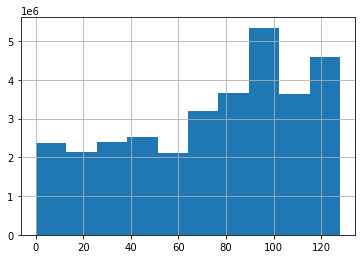

In [39]:
occupancy_instance.stream.TDC_CHANNEL.hist()

In [40]:
data = occupancy_instance.select_data()
# trigger = occupancy_instance.select_trigger(n=-1)


Separating data rows from trigger rows...


In [41]:
run_time = occupancy_instance.compute_run_time(data)

In [42]:
run_time

10956.44209296

In [12]:
data_fpga0, data_fpga1 = occupancy_instance.split_fpga(data)

In [13]:
def create_mask(array, lower_bound: float, upper_bound: float):
    lower_mask = array > lower_bound
    upper_mask = array < upper_bound
    return lower_mask & upper_mask

In [14]:
data_fpga0 = data_fpga0[create_mask(data_fpga0['DRIFT_TIME'], 0, 400)]
data_fpga1 = data_fpga1[create_mask(data_fpga1['DRIFT_TIME'], 0, 400)]

In [15]:
hist_0 = occupancy_instance.make_histogram(data_fpga0)
hist_1 = occupancy_instance.make_histogram(data_fpga1)
    
# rate_hist_0 = occupancy_instance.make_rate_histogram(hist_0, run_time)
# rate_hist_1 = occupancy_instance.make_rate_histogram(hist_1, run_time)

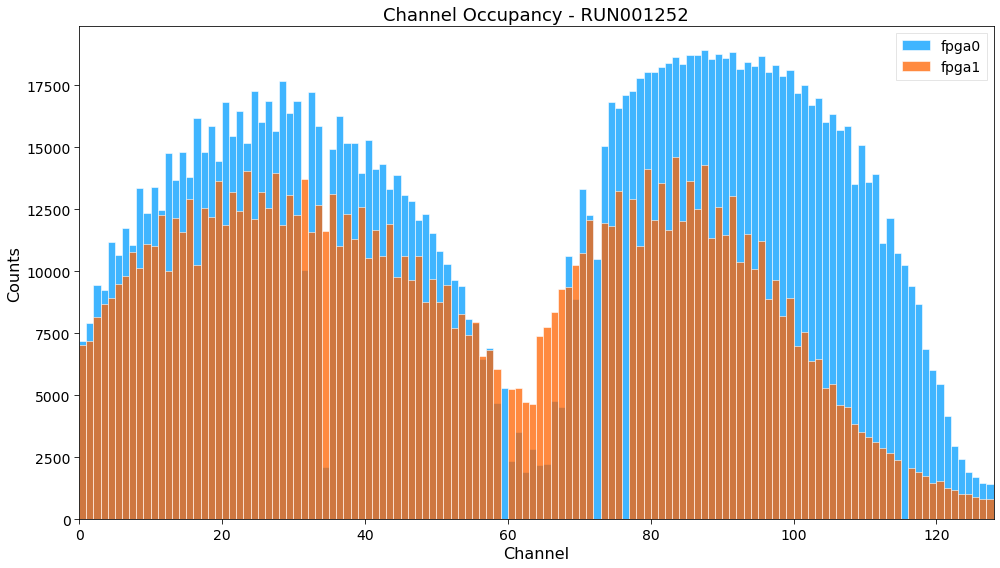

In [16]:
fig, ax = plt.subplots(figsize=(14,8))

ax = sns.histplot(x=np.arange(128),  bins=np.arange(129), weights=hist_0,
                    stat='count', element='bars', fill=True, color='#009cff', edgecolor='white',
                    label='fpga0')
ax = sns.histplot(x=np.arange(128),  bins=np.arange(129), weights=hist_1,
                    stat='count', element='bars', fill=True, color='#FF6300', edgecolor='white',
                    label='fpga1')

ax.set_xlim(0, 128)

title = 'Occupancy'
ylabel = 'Counts'

ax.set_title(f'Channel {title} - RUN00{RUNNUMBER}', fontsize = 18)
ax.set_xlabel('Channel', fontsize = 16)
ax.set_ylabel(ylabel, fontsize = 16)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

ax.legend()
change_legend(ax=ax, new_loc="upper right", fontsize=14, titlesize=16)

fig.tight_layout()

plt.show()

In [17]:
# fig, ax = plt.subplots(figsize=(14,8))

# ax = sns.histplot(x=np.arange(128),  bins=np.arange(129), weights=rate_hist_0,
#                     stat='count', element='bars', fill=True, color='#009cff', edgecolor='white',
#                     label='fpga0')
# ax = sns.histplot(x=np.arange(128),  bins=np.arange(129), weights=rate_hist_1,
#                     stat='count', element='bars', fill=True, color='#FF6300', edgecolor='white',
#                     label='fpga1')

# ax.set_xlim(0, 128)

# title = 'Rate'
# ylabel = 'Rate [Hz]'

# ax.set_title(f'Channel {title} - RUN00{RUNNUMBER}', fontsize = 18)
# ax.set_xlabel('Channel', fontsize = 16)
# ax.set_ylabel(ylabel, fontsize = 16)

# ax.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

# ax.legend()
# change_legend(ax=ax, new_loc="upper right", fontsize=14, titlesize=16)

# fig.tight_layout()

# plt.show()

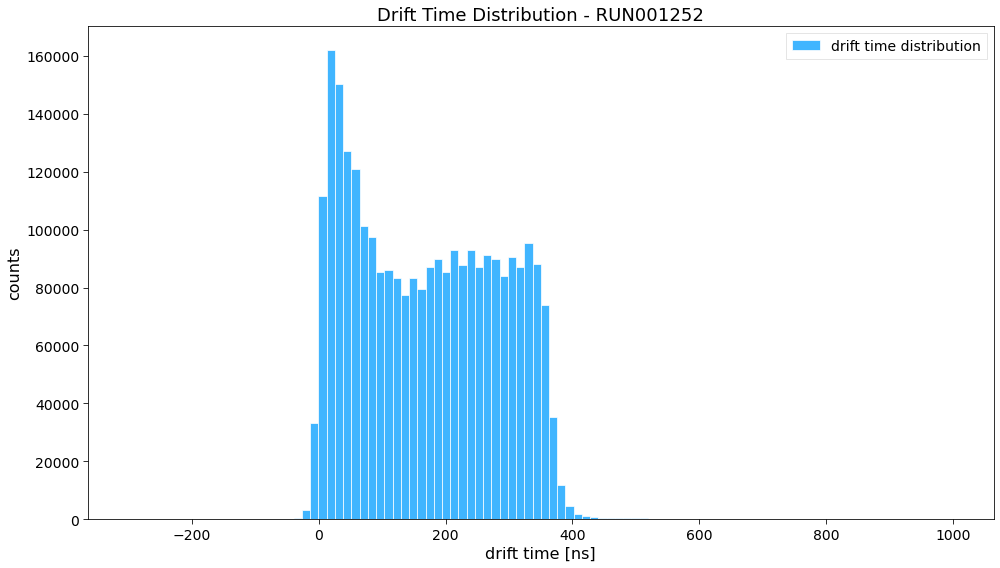

In [18]:
fig, ax = plt.subplots(figsize=(14,8))

ax = sns.histplot(x=data['DRIFT_TIME'],  bins=100,
                    stat='count', element='bars', fill=True, color='#009cff', edgecolor='white',
                    label='drift time distribution')

# ax.set_xlim(-400, 900)


ax.set_title(f'Drift Time Distribution - RUN00{RUNNUMBER}', fontsize = 18)
ax.set_xlabel('drift time [ns]', fontsize = 16)
ax.set_ylabel('counts', fontsize = 16)

ax.tick_params(axis = 'both', which = 'major', labelsize = 14, direction = 'out', length = 5)

ax.legend()
change_legend(ax=ax, new_loc="upper right", fontsize=14, titlesize=16)

fig.tight_layout()

plt.show()